<h2 id="#data-understanding">Data Understanding</h2>


### Importing Needed packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns 
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

### Data Import


In [2]:
# Import input (x) and output (y) data, and asign these to df1 and df1

X = pd.read_csv('StatsVideosXALL.csv')

Y = pd.read_csv('StatsVideosYALL.csv')

### Data Description


In [3]:
X.head()

,Likes,Dislikes,Subscribers
0,104460,3365,7300000
1,103203,3570,3300000
2,22485,612,1800000
3,23077,1337,465000
4,12315,522,11000000


In [4]:
Y.head()

,Views
0,1988888
1,2617005
2,932230
3,1165800
4,551165


In [5]:
#join the two dataframes(df1+df2)
frames = [X, Y]

df_join = pd.concat(frames , axis=1 ,ignore_index=False)
df_join.head()

,Likes,Dislikes,Subscribers,Views
0,104460,3365,7300000,1988888
1,103203,3570,3300000,2617005
2,22485,612,1800000,932230
3,23077,1337,465000,1165800
4,12315,522,11000000,551165


In [6]:
#data information
df_join.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3364 entries, 0 to 3363
Data columns (total 4 columns):
Likes          3364 non-null int64
Dislikes       3364 non-null int64
Subscribers    3364 non-null int64
Views          3364 non-null int64
dtypes: int64(4)
memory usage: 105.2 KB


In [7]:
# get data statistical summary
df_join.describe()

,Likes,Dislikes,Subscribers,Views
count,3.364000e+03,3.364000e+03,3.364000e+03,3.364000e+03
mean,1.298265e+05,1.177348e+04,2.486401e+06,2.110672e+07
std,5.845796e+05,1.857651e+05,5.676479e+06,1.143878e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01
25%,5.850000e+02,2.800000e+01,4.600000e+04,3.831525e+04
50%,5.535000e+03,2.205000e+02,3.910000e+05,4.493690e+05
75%,4.092750e+04,2.059000e+03,1.800000e+06,4.022392e+06
max,1.024205e+07,9.653039e+06,7.100000e+07,2.668027e+09


In [8]:
#Show if there are missing datapoints
#summay of null values(checks if we have null values in our dataset)
#1st way(boolean)
print(df_join.isnull().any())
#2nd way(real value)
print(df_join.isnull().sum())


Likes          False
Dislikes       False
Subscribers    False
Views          False
dtype: bool
Likes          0
Dislikes       0
Subscribers    0
Views          0
dtype: int64


**Fortunately, there is no missing values also all the columns's values are a real numbers. Thus, there's no need for the data processing task.**

<h2 id="data_exploration">Data Exploration</h2>


Lets see the correlation between features

In [9]:
# Correlation Matrix 
df_join.corr()

,Likes,Dislikes,Subscribers,Views
Likes,1.000000,0.462453,0.290697,0.882960
Dislikes,0.462453,1.000000,0.155162,0.477665
Subscribers,0.290697,0.155162,1.000000,0.262910
Views,0.882960,0.477665,0.262910,1.000000


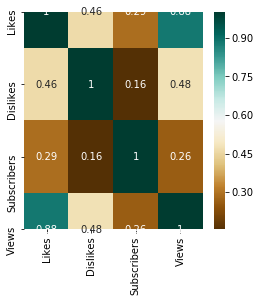

In [10]:
# Correlation Matrix(clear representation)
plt.figure(figsize=(4,4))
c = df_join.corr()
corr = sns.heatmap(c,cmap="BrBG",annot=True)

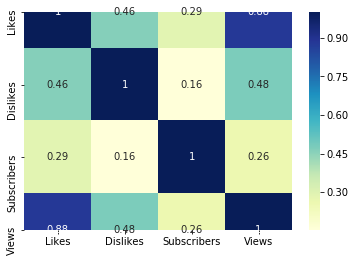

In [11]:
sns.heatmap(df_join.corr(), annot=True, cmap='YlGnBu')

Lets plot the output(Views) values with respect to the features(Liles, Dislikes and Subscribers)

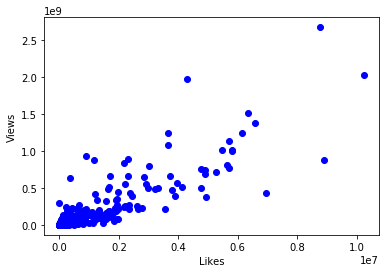

In [12]:
#Views and Likes
plt.scatter(X.Likes, Y.Views,  color='blue')
plt.xlabel("Likes")
plt.ylabel("Views")
plt.show()


(0, 2806715772.034262)

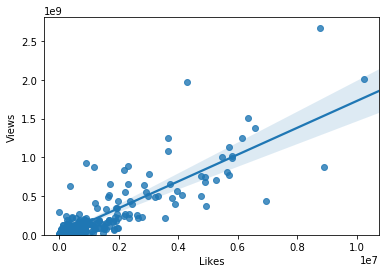

In [13]:
plt.figure()
sns.regplot(x="Likes", y="Views", data=df_join[['Likes','Views']])
plt.ylim(0,)

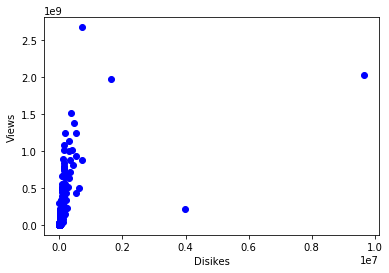

In [14]:
#Views and Likes
plt.scatter(X.Dislikes, Y.Views,  color='blue')
plt.xlabel("Disikes")
plt.ylabel("Views")
plt.show()

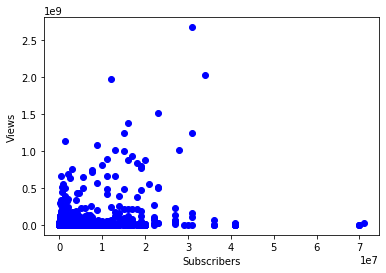

In [15]:
#Views and Likes
plt.scatter(X.Subscribers, Y.Views,  color='blue')
plt.xlabel("Subscribers")
plt.ylabel("Views")
plt.show()

<h2 id="#regression_model">Multiple Regression Model</h2>

### Training


In [16]:
# Split the data into input (x) training and testing data, and ouput (y) training and testing data, 
# Split the data into input (x) training and testing data, and ouput (y) training and testing data, 
# with training data being 80% of the data, and testing data being the remaining 20% of the data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [17]:
# Scale both training and testing input data

X_train = preprocessing.scale(X_train)

X_test = preprocessing.scale(X_test)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

C:\Users\rahmaa\Anaconda3\envs\DeepLearning\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


Train set: (2691, 3) (2691, 1)
Test set: (673, 3) (673, 1)


C:\Users\rahmaa\Anaconda3\envs\DeepLearning\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  """


In [18]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit (X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
print("the values of the Slopes (coefficients) are:",reg.coef_)
print("the value of the intercept is:",reg.intercept_)

the values of the Slopes (coefficients) are: [[98154082.54851925  7492569.92846102  1387452.37220269]]
the value of the intercept is: [21140654.98550725]


### Predictions


In [20]:
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

print(len(y_train_pred))
print(len(y_test_pred))


2691
673


### Evaluation


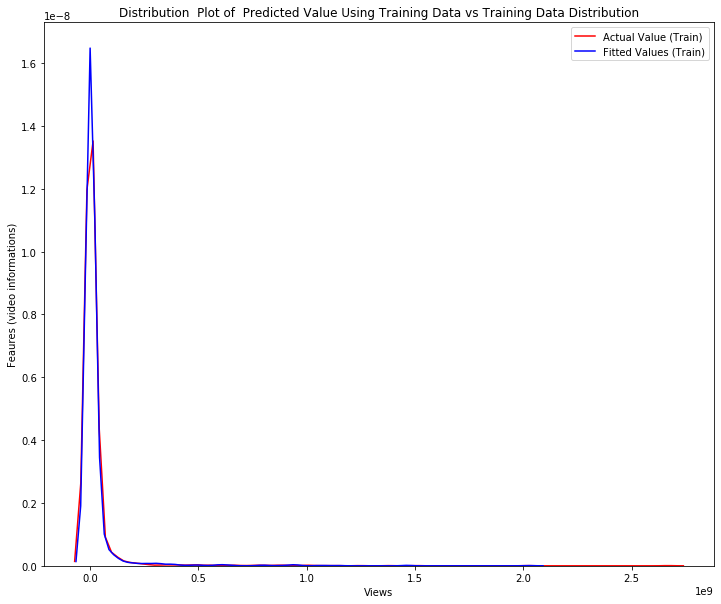

In [21]:
#distribution plot:
width = 12
height = 10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(Y_train, hist=False, color="r", label="Actual Value (Train)")
sns.distplot(y_train_pred, hist=False, color="b", label="Fitted Values (Train)" , ax=ax1)


plt.title('Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution')
plt.xlabel('Views')
plt.ylabel('Feaures (video informations)')

plt.show()
plt.close()

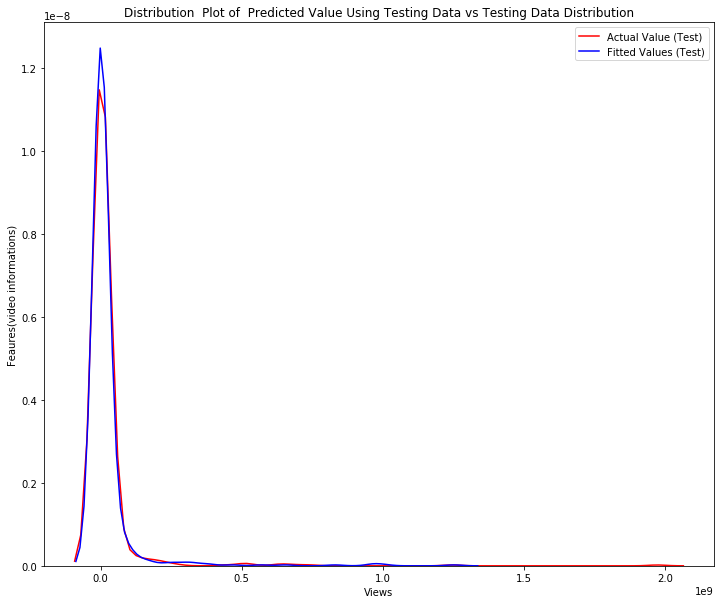

In [22]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(Y_test, hist=False, color="r", label="Actual Value (Test)")
sns.distplot(y_test_pred, hist=False, color="b", label="Fitted Values (Test)" , ax=ax1)


plt.title('Distribution  Plot of  Predicted Value Using Testing Data vs Testing Data Distribution')
plt.xlabel('Views')
plt.ylabel('Feaures(video informations)')

plt.show()
plt.close()

In [23]:
print('Multiple Linear Regression Performance:')
print('MAE:', metrics.mean_absolute_error(Y_test, y_test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred)))
print('R2_Score:', metrics.r2_score(Y_test, y_test_pred))

Multiple Linear Regression Performance:
MAE: 13156154.457862364
RMSE: 53130003.14567443
R2_Score: 0.7795452453525548


<h2 id="#deep_learning_model">Deep Learning Model</h2>

In [24]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
# Defines "deep" model and its structure
model = Sequential()
model.add(Dense(20, input_shape=(3,), activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1,))
model.compile(Adam(lr=0.003), 'mean_squared_error')

# Pass several parameters to 'EarlyStopping' function and assigns it to 'earlystopper'
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')


# Fits model over 2000 iterations with 'earlystopper' callback, and assigns it to history
history = model.fit(X_train, Y_train, epochs = 2000, validation_split = 0.2,shuffle = True, verbose = 0, 
                    callbacks = [earlystopper])

# Plot training loss and validation split loss(testing loss) over the epochs
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.figure()
plt.figure()
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='testing loss')
plt.legend()
plt.title('Loss')
plt.xlabel("Epochs")
# Plot accuracy over the epochs

accuracy_values = history_dict['acc']
val_accuracy_values=history_dict['val_acc']
plt.plot(accuracy_values,'-r',label='training acc')
plt.plot(val_accuracy_values,'-g',label='testing acc')
plt.title('accurarcy')
plt.legend()


Epoch 00045: early stopping


NameError: name 'history_dict' is not defined

In [ ]:
# Runs model with its current weights on the training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculates and prints r2 score of the testing data
print('Deep Learning Performance:')
print('MAE:', metrics.mean_absolute_error(Y_test, y_test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred)))
print('R2_Score:', metrics.r2_score(Y_test, y_test_pred))